# ITD214 Assignment – Applied Data Science Project
Student ID:  	6067792V                                               
Name:		Soe Lai Nwe

•	This data set is collected from Kaggle https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews

- This python file is for Generate Test Design, Build model, Assessment,Evaluation

# Import libraries and download the packages

In [1]:
# Enter code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string

In [2]:
# Read in combines reviews file
filepath= "D:/2024/NYP Applied Data Science/ITD 214/#Sephora Product and skincare reviews/combined_reviews.csv"
df = pd.read_csv(filepath,encoding='latin-1')
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\3948632449.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,encoding='latin-1')


,Column0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [3]:
columns_to_drop = ["Column0","helpfulness","total_feedback_count","skin_tone","eye_color","skin_type","hair_color"]
df = df.drop(columns=columns_to_drop)

In [4]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,0,2,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,0,0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
df.shape

(1094411, 12)

In [6]:
# find completely deplicate rows 
duplicate_all_columns = df[df.duplicated()]

In [7]:
# Display the number of duplicated rows
print(f"Number of duplicate rows:{duplicate_all_columns.shape[0]}")

Number of duplicate rows:242


In [8]:
print(duplicate_all_columns["rating"])

5339       5
5477       5
7242       5
7244       5
7911       5
          ..
994985     5
1014797    5
1049735    5
1058245    5
1070403    5
Name: rating, Length: 242, dtype: int64


In [9]:
# Statistics on our numeric columns
df.describe()

,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,926423.000000,1.094411e+06,1.094411e+06,1.094411e+06
mean,4.299158e+00,0.839962,8.948695e-01,3.282257e+00,4.900838e+01
std,1.149444e+00,0.366642,5.288943e+00,1.967482e+01,4.004338e+01
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.000000e+00
25%,4.000000e+00,1.000000,0.000000e+00,0.000000e+00,2.500000e+01
50%,5.000000e+00,1.000000,0.000000e+00,0.000000e+00,3.900000e+01
75%,5.000000e+00,1.000000,1.000000e+00,3.000000e+00,6.200000e+01
max,5.000000e+00,1.000000,1.159000e+03,5.050000e+03,1.900000e+03


In [10]:
df.shape

(1094411, 12)

In [11]:
df.isnull().sum()

author_id                        0
rating                           0
is_recommended              167988
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [12]:
# Lets see how these records with missing is_recommended
df.loc[df['is_recommended'].isna()].head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd
15900,1296660394,4,NaN,0,0,2017-08-23,Not the most moisturizing mask I have tried. T...,love the taste/scent,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15901,1086759071,5,NaN,18,156,2017-08-22,This stuff is a miracle worker. I love lipstic...,I can wear lipstick again!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15902,2433933866,5,NaN,0,0,2017-08-22,This is a game changer. I have tried other ove...,HG for life,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15903,5944955520,5,NaN,0,0,2017-08-21,Oh my lanta. There are no words to describe ho...,My Lips Have Never Been Softer,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15904,1043341645,3,NaN,0,0,2017-08-21,While this stuff feels great on your lips and ...,Good but not great,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [13]:
# Number of records before dropping our missing values
df.shape

(1094411, 12)

# Removing Null values

In [14]:
# Let's drop these records since we can't build our required matrixes 
df = df.dropna(subset=['is_recommended'])

In [15]:
# Number of records after dropping our missing values
df.shape

(926423, 12)

In [16]:
df.describe()

,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000
mean,4.288943,0.839962,0.917260,3.222982,50.035459
std,1.154414,0.366642,5.351072,19.665801,41.065237
min,1.000000,0.000000,0.000000,0.000000,3.000000
25%,4.000000,1.000000,0.000000,0.000000,25.000000
50%,5.000000,1.000000,0.000000,0.000000,40.000000
75%,5.000000,1.000000,1.000000,3.000000,65.000000
max,5.000000,1.000000,1159.000000,5050.000000,1900.000000


In [17]:
# View a summary of our data
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  926423
Columns  :  12

Features : 
 ['author_id', 'rating', 'is_recommended', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'product_id', 'product_name', 'brand_name', 'price_usd']

Missing values :   292044

Unique values :  
 author_id                   450697
rating                           5
is_recommended                   2
total_neg_feedback_count       244
total_pos_feedback_count       551
submission_time               2035
review_text                 811588
review_title                305080
product_id                    2351
product_name                  2334
brand_name                     142
price_usd                      221
dtype: int64


In [18]:
df.to_csv("df_rating.csv")

In [19]:
df_rating = pd.read_csv("df_rating.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\3661024422.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rating = pd.read_csv("df_rating.csv")


In [20]:
df_rating.head()

,Unnamed: 0,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,0,2,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,0,0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import Button
import ipywidgets as widgets
from datetime import datetime

# Constructs a DATETIME value

In [22]:
from datetime import datetime

In [23]:
df_rating['submission_time'] = pd.to_datetime(df_rating['submission_time'], format='%Y-%m-%d')

In [24]:
df_rating['submission_time'] = pd.to_datetime(df['submission_time'])

df_rating['Year'] = df_rating['submission_time'].dt.year
df_rating['Month'] = df_rating['submission_time'].dt.month
df_rating['Date'] = df_rating['submission_time'].dt.day

In [25]:
df_rating.head()

,Unnamed: 0,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd,Year,Month,Date
0,0,1741593524,5,1.0,0,2,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0
1,1,31423088263,1,0.0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0
2,2,5061282401,5,1.0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0
3,3,6083038851,5,1.0,0,0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0
4,4,47056667835,5,1.0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0


In [26]:
df_rating= df_rating.drop(columns=['total_neg_feedback_count','total_pos_feedback_count'])

In [27]:
df_rating.head()

,Unnamed: 0,author_id,rating,is_recommended,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd,Year,Month,Date
0,0,1741593524,5,1.0,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0
1,1,31423088263,1,0.0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0
2,2,5061282401,5,1.0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0
3,3,6083038851,5,1.0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0
4,4,47056667835,5,1.0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0


In [28]:
df_rating= df_rating.drop(columns='Unnamed: 0')

In [29]:
df_rating.head()

,author_id,rating,is_recommended,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd,Year,Month,Date
0,1741593524,5,1.0,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0
1,31423088263,1,0.0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0
2,5061282401,5,1.0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0
3,6083038851,5,1.0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0
4,47056667835,5,1.0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0


In [30]:
df_rating.describe()

,rating,is_recommended,submission_time,price_usd,Year,Month,Date
count,926423.000000,926423.000000,771866,926423.000000,771866.000000,771866.000000,771866.000000
mean,4.288943,0.839962,2020-09-04 07:03:57.464015104,50.035459,2020.223132,5.972521,15.760216
min,1.000000,0.000000,2017-08-25 00:00:00,3.000000,2017.000000,1.000000,1.000000
25%,4.000000,1.000000,2019-08-07 00:00:00,25.000000,2019.000000,3.000000,8.000000
50%,5.000000,1.000000,2020-09-03 00:00:00,40.000000,2020.000000,6.000000,16.000000
75%,5.000000,1.000000,2021-11-05 00:00:00,65.000000,2021.000000,9.000000,23.000000
max,5.000000,1.000000,2023-03-21 00:00:00,1900.000000,2023.000000,12.000000,31.000000
std,1.154414,0.366642,NaN,41.065237,1.483602,3.402382,8.650244


In [31]:
#unique,counts = np.unique(df['product_id'], return_counts=True)
#relation_count = dict(zip(unique,counts))

In [32]:
#print(relation_count)

In [33]:
df_itemid = pd.value_counts(df['rating'])
df_itemid

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\772214134.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_itemid = pd.value_counts(df['rating'])


rating
5    587081
4    170192
3     71395
1     52493
2     45262
Name: count, dtype: int64

# Combine 'review_text' and 'review_title' and creat new column named 'merged-review'

In [34]:
df_rating['merged_review'] = df_rating.apply(lambda row: f"{row['review_text']}, {row['review_title']}", axis=1)
print(df_rating)

          author_id  rating  is_recommended submission_time  \
0        1741593524       5             1.0      2023-02-01   
1       31423088263       1             0.0      2023-03-21   
2        5061282401       5             1.0      2023-03-21   
3        6083038851       5             1.0      2023-03-20   
4       47056667835       5             1.0      2023-03-20   
...             ...     ...             ...             ...   
926418   9109189891       5             1.0      2022-09-06   
926419   8115925555       5             1.0      2022-09-05   
926420  10723607564       5             1.0      2022-09-05   
926421   5953458355       5             1.0      2022-09-04   
926422  24486949963       5             1.0      2022-09-03   

                                              review_text  \
0       I use this with the Nudestix âCitrus Clean B...   
1       I bought this lip mask after reading the revie...   
2       My review title says it all! I get so excited ...   

In [35]:
df_rating.head()

,author_id,rating,is_recommended,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review
0,1741593524,5,1.0,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...
1,31423088263,1,0.0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...
2,5061282401,5,1.0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...
3,6083038851,5,1.0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...
4,47056667835,5,1.0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h..."


#drop review_text and review_title column

In [36]:
df_rating = df_rating.drop(columns="review_text")

In [37]:
df_rating = df_rating.drop(columns="review_title")

In [38]:
df_rating.head()

,author_id,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review
0,1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...
1,31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...
2,5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...
3,6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...
4,47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h..."


In [39]:
df_rating.shape

(926423, 12)

In [40]:
df_rating.head()

,author_id,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review
0,1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...
1,31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...
2,5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...
3,6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...
4,47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h..."


In [41]:
print(df_rating.dtypes)

author_id                  object
rating                      int64
is_recommended            float64
submission_time    datetime64[ns]
product_id                 object
product_name               object
brand_name                 object
price_usd                 float64
Year                      float64
Month                     float64
Date                      float64
merged_review              object
dtype: object


#  Calculate the Length of Each Review

In [42]:
df_rating['review_length'] = df_rating['merged_review'].apply(len)
print(df)

           author_id  rating  is_recommended  total_neg_feedback_count  \
0         1741593524       5             1.0                         0   
1        31423088263       1             0.0                         0   
2         5061282401       5             1.0                         0   
3         6083038851       5             1.0                         0   
4        47056667835       5             1.0                         0   
...              ...     ...             ...                       ...   
1094406   9109189891       5             1.0                         0   
1094407   8115925555       5             1.0                         0   
1094408  10723607564       5             1.0                         0   
1094409   5953458355       5             1.0                         0   
1094410  24486949963       5             1.0                         0   

         total_pos_feedback_count submission_time  \
0                               2      2023-02-01   
1    

# Categorize the Reviews

In [43]:
# Define the threshold for long and short reviews
threshold = 100

# Categorize the reviews
df_rating['review_type'] = df_rating['review_length'].apply(lambda x: 'long' if x > threshold else 'short')
print(df)

           author_id  rating  is_recommended  total_neg_feedback_count  \
0         1741593524       5             1.0                         0   
1        31423088263       1             0.0                         0   
2         5061282401       5             1.0                         0   
3         6083038851       5             1.0                         0   
4        47056667835       5             1.0                         0   
...              ...     ...             ...                       ...   
1094406   9109189891       5             1.0                         0   
1094407   8115925555       5             1.0                         0   
1094408  10723607564       5             1.0                         0   
1094409   5953458355       5             1.0                         0   
1094410  24486949963       5             1.0                         0   

         total_pos_feedback_count submission_time  \
0                               2      2023-02-01   
1    

In [44]:
# Count of long and short reviews
review_counts = df_rating['review_type'].value_counts()
print(review_counts)

review_type
long     860929
short     65494
Name: count, dtype: int64


In [45]:
# Read in combines reviews file
filepathh= "D:/2024/NYP Applied Data Science/ITD 214/#Sephora Product and skincare reviews/heart.csv"
df2 = pd.read_csv(filepathh,encoding='latin-1')
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
df2.shape

(303, 14)

# df_rating2 file saving

In [47]:
#df_rating.to_csv("df_rating2.csv")

In [51]:
df_rating2 = pd.read_csv('df_rating2.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\1213637516.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rating2 = pd.read_csv('df_rating2.csv')


In [49]:
#df_rating2.head()

In [52]:
# Fill NaN values with 0 or another appropriate value before converting
df_rating2['Year'] = df_rating2['Year'].fillna(0).astype(int)
df_rating2['Month'] = df_rating2['Month'].fillna(0).astype(int)
df_rating2['Date'] = df_rating2['Date'].fillna(0).astype(int)

In [53]:
df_rating2.head()

,Unnamed: 0,author_id,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,0,1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...,497,long
1,1,31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...,176,long
2,2,5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...,294,long
3,3,6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...,267,long
4,4,47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h...",230,long


C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\169120793.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")


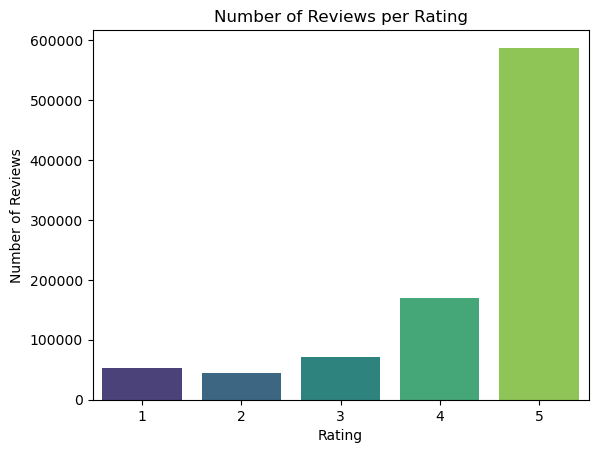

In [54]:
#This shows the count of reviews for each rating.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df_rating

# Count the number of reviews for each rating
rating_counts = df_rating['rating'].value_counts().sort_index()

# Plot a bar graph
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

#Visualize common words in reviews associated with a specific rating.

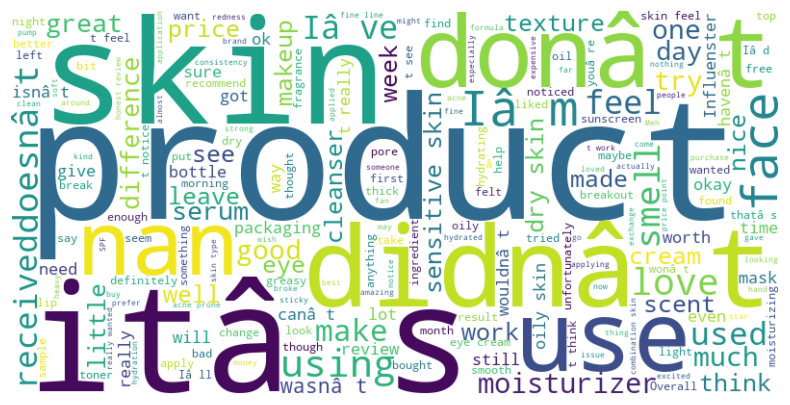

In [55]:
from wordcloud import WordCloud

# Filter reviews for a specific rating
rating_to_filter = 3
filtered_reviews = df_rating.loc[df_rating['rating'] == rating_to_filter, 'merged_review']

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_reviews.dropna()))

# Display the word cloudpro
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Product_name associated with rating 3

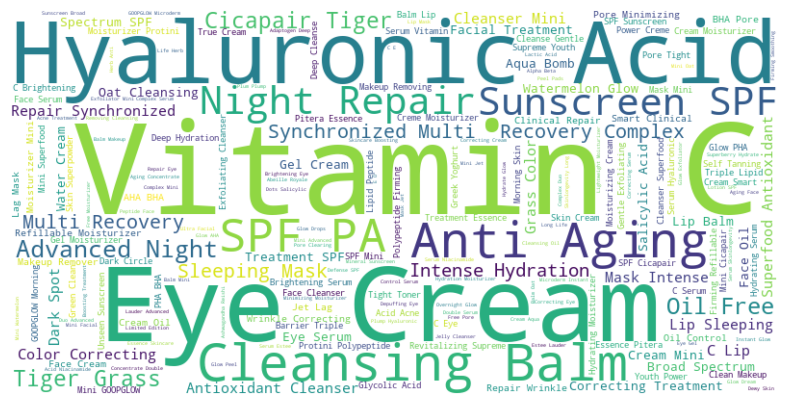

In [56]:
from wordcloud import WordCloud

# Filter reviews for a specific rating
rating_to_filter = 3
filtered_reviews = df_rating.loc[df_rating['rating'] == rating_to_filter, 'product_name']

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_reviews.dropna()))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# brand name associated with rating 5

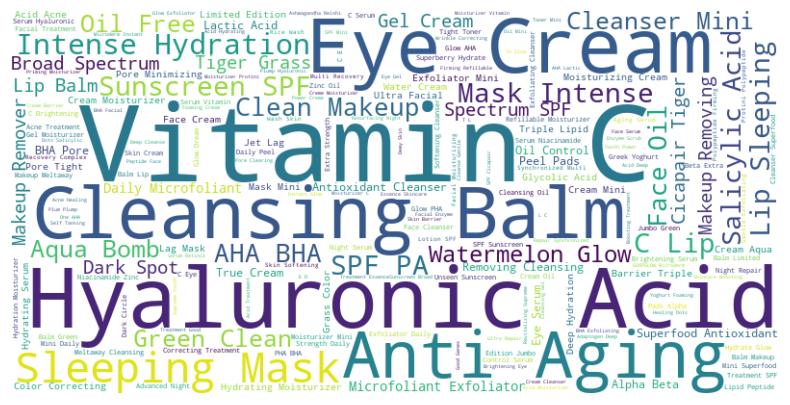

In [57]:
from wordcloud import WordCloud

# Filter reviews for a specific rating
rating_to_filter = 5
filtered_reviews = df_rating.loc[df_rating['rating'] == rating_to_filter, 'product_name']

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_reviews.dropna()))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Top Brands with long reviews

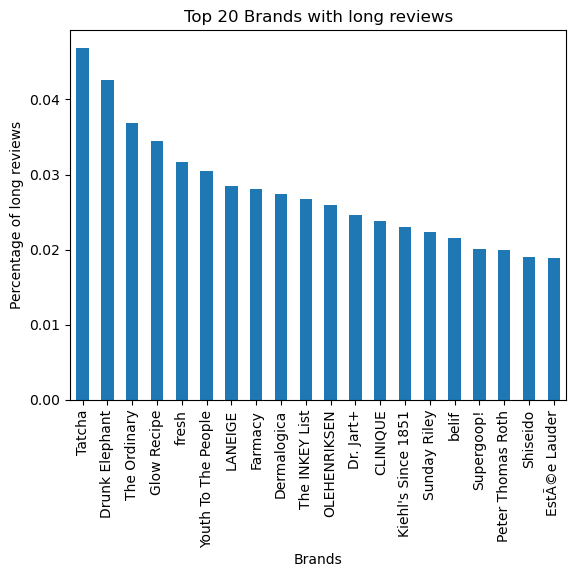

In [58]:
df_rating[ df_rating.review_type == 'long' ].brand_name.value_counts(normalize=True, ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Brands with long reviews")
plt.xlabel("Brands")
plt.ylabel("Percentage of long reviews")
plt.show()

# Top Brands with short reviews

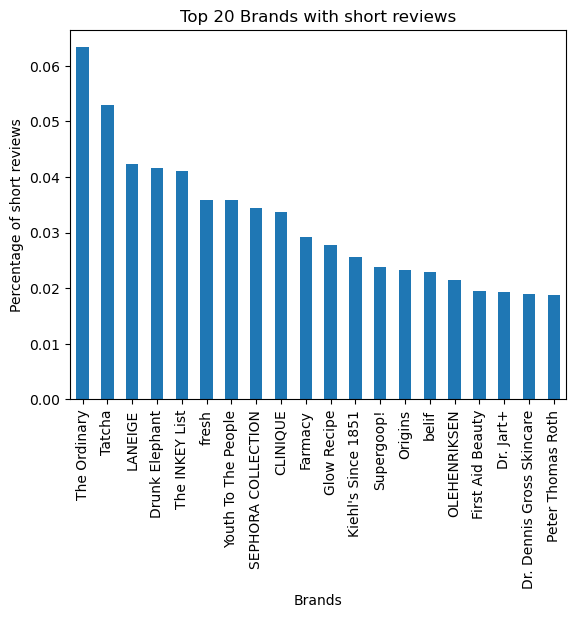

In [59]:
df_rating[ df_rating.review_type == 'short' ].brand_name.value_counts(normalize=True, ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Brands with short reviews")
plt.xlabel("Brands")
plt.ylabel("Percentage of short reviews")
plt.show()

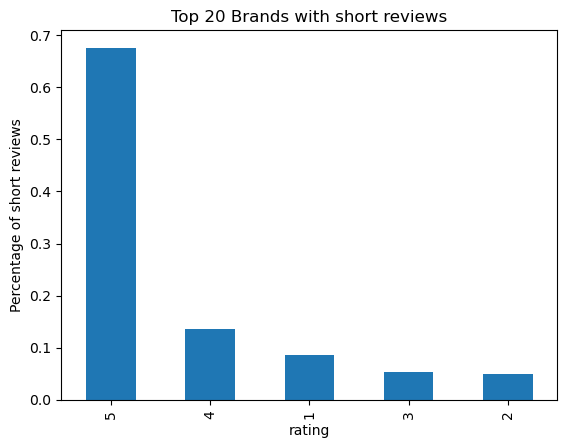

In [60]:
df_rating[ df_rating.review_type == 'short' ].rating.value_counts(normalize=True, ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Brands with short reviews")
plt.xlabel("rating")
plt.ylabel("Percentage of short reviews")
plt.show()

In [65]:
df_rating2.head()

,Unnamed: 0,author_id,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,0,1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
1,1,31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
2,2,5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
3,3,6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
4,4,47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long


# Sentiment analysis

In [64]:
# Enter code here
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim import corpora

import string
from pathlib import Path
from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
df_review = df_rating['merged_review']

In [67]:
df_review.head()

0    I use this with the Nudestix âCitrus Clean B...
1    I bought this lip mask after reading the revie...
2    My review title says it all! I get so excited ...
3    Iâve always loved this formula for a long ti...
4    If you have dry cracked lips, this is a must h...
Name: merged_review, dtype: object

In [69]:
# Read in reviews and display the first 5 lines of the data
df_sentiment = pd.read_csv('df_rating2.csv', index_col='author_id')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\1618652716.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sentiment = pd.read_csv('df_rating2.csv', index_col='author_id')


In [70]:
df_sentiment = df_sentiment.drop(columns= 'Unnamed: 0')

In [71]:
df_sentiment.head()

,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
author_id,,,,,,,,,,,,,
1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long


In [72]:
pd.read_csv('df_rating2.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\933895060.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('df_rating2.csv')


,Unnamed: 0,author_id,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,0,1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
1,1,31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
2,2,5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
3,3,6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
4,4,47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926418,926418,9109189891,5,1.0,2022-09-06,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022.0,9.0,6.0,I LOVE this stuff! It works amazingly well at ...,257,long
926419,926419,8115925555,5,1.0,2022-09-05,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022.0,9.0,5.0,love this micellar water from Milk! it removes...,213,long
926420,926420,10723607564,5,1.0,2022-09-05,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022.0,9.0,5.0,I loveeeeee Milk!!! Just discovered this brand...,216,long
926421,926421,5953458355,5,1.0,2022-09-04,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022.0,9.0,4.0,"My new favorite makeup remover. First of all, ...",413,long


In [ ]:
import os
import pandas as pd

rating = 'df_rating2.csv'

reviews_df = pd.read_csv(rating)
reviews = list(reviews_df.merged_review.values)
print(len(reviews))

In [ ]:
reviews_df.shape

In [ ]:
reviews[:25]

Text Cleaning:

- Remove or normalize unwanted characters (e.g., URLs, HTML tags, emojis).
- Lowercase the text and remove stopwords (optional).
- Tokenize the text into words.

In [ ]:
import tensorflow as tf

tf.keras.preprocessing.text.Tokenizer(
    num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
    split=' ', char_level=False, oov_token=None, document_count=0
)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the words in reviews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
total_words = len(tokenizer.word_index) + 1
print('Total words: ', total_words)

In [ ]:
tokenizer.word_index

In [ ]:
# Print a subset of the word_index dictionary created by Tokenizer
subset_dict = {key: value for key, value in tokenizer.word_index.items() \
               if key in ['Love','the','fragrance','and','works','great']} #Love the fragrance and works great
print(subset_dict)

In [73]:
df_rating2.head()

,Unnamed: 0,author_id,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,0,1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
1,1,31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
2,2,5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
3,3,6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
4,4,47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long


In [74]:
df_rating2.head()

,Unnamed: 0,author_id,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,0,1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
1,1,31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
2,2,5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
3,3,6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
4,4,47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long


In [80]:
# print percentage of both labels present

print("Author Recommend percentage", round(df_rating2.is_recommended.value_counts()[1]/len(df) *100 ,2), "%")
print("Author Unrecommend percentage", round(df_rating2.is_recommended.value_counts()[0]/len(df) *100 ,2), "%")

Author Recommend percentage 84.0 %
Author Unrecommend percentage 16.0 %


In [76]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem import PorterStemmer

def preprocess_text(text, remove_digits=True):
    # Removing HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Removing square brackets
    text = re.sub('\[[^]]*\]', '', text)
    
    # Removing special characters
    if remove_digits:
        text = re.sub('[^a-zA-Z\s]', '', text)
    else:
        text = re.sub('[^a-zA-Z0-9\s]', '', text)
    
    # Lowercasing
    text = text.lower()
    
    # Stemming
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    
    # Removing stopwords
    stopword_list = set(stopwords.words('english'))
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [78]:
print('Before preprocessing \n', df_rating2['merged_review'][2])

df['text'] = df_rating2['merged_review'].apply(preprocess_text)

print('After preprocessing \n', df_rating2['merged_review'][2])

Before preprocessing 
 My review title says it all! I get so excited to get into bed and apply this lip mask. I do see a difference because I suffer from dry cracked lips. I drink a lot of water and apply lip balm daily but nothing helped until I started using this. untiluntistafted usinf this., New Favorite Routine


C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\534043245.py:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


After preprocessing 
 My review title says it all! I get so excited to get into bed and apply this lip mask. I do see a difference because I suffer from dry cracked lips. I drink a lot of water and apply lip balm daily but nothing helped until I started using this. untiluntistafted usinf this., New Favorite Routine


In [82]:
df_rating2 = pd.read_csv('df_rating2.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\1213637516.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rating2 = pd.read_csv('df_rating2.csv')


In [83]:
df_rating2.head()

,Unnamed: 0,author_id,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,0,1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
1,1,31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
2,2,5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
3,3,6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
4,4,47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long


In [ ]:
df_rating2 = df_rating2.drop(columns = submission_time)

In [85]:
df_rating2.head()

,Unnamed: 0,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,0,1741593524,5,1.0,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
1,1,31423088263,1,0.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
2,2,5061282401,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
3,3,6083038851,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
4,4,47056667835,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long


In [88]:
df_rating2 = df_rating2.drop(columns = 'Unnamed: 0')

In [89]:
df_rating2.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,1741593524,5,1.0,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
1,31423088263,1,0.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
2,5061282401,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
3,6083038851,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
4,47056667835,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long


# Random Forest model

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df_rating2[['price_usd','review_length','is_recommended']]
y = df_rating2['rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier (example model)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6618668537658202
              precision    recall  f1-score   support

           1       0.38      0.41      0.39     10508
           2       0.30      0.28      0.29      8966
           3       0.31      0.22      0.26     14463
           4       0.25      0.07      0.11     33936
           5       0.76      0.94      0.84    117412

    accuracy                           0.66    185285
   macro avg       0.40      0.38      0.38    185285
weighted avg       0.59      0.66      0.61    185285



In [99]:
df_rating2.dtypes

author_id          object
rating              int64
is_recommended    float64
product_id         object
product_name       object
brand_name         object
price_usd         float64
Year              float64
Month             float64
Date              float64
merged_review      object
review_length       int64
review_type        object
dtype: object

In [102]:
#df_rating2.to_csv("df_rating3.csv")

In [112]:
df_rating2.to_csv('df_rating3.csv', index=False)

In [113]:
df_rating3 = pd.read_csv('df_rating3.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\1450767000.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rating3 = pd.read_csv('df_rating3.csv')


In [114]:
df_rating3.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,1741593524,5,1.0,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
1,31423088263,1,0.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
2,5061282401,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
3,6083038851,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
4,47056667835,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long


In [116]:
df_rating3.dtypes

author_id          object
rating              int64
is_recommended    float64
product_id         object
product_name       object
brand_name         object
price_usd         float64
Year              float64
Month             float64
Date              float64
merged_review      object
review_length       int64
review_type        object
dtype: object

In [118]:
import pandas as pd

# Specify data types for columns (example)
dtype_dict = {
    'author_id': 'str',
    'rating': 'int64',
    'is_recommended': 'float64',
    'product_id': 'str',
    'product_name': 'str',
    'brand_name': 'str',
    'price_usd': 'float64',
    'Year': 'float64',
    'Month': 'float64',
    'Date': 'float64',
    'merged_review': 'str',
    'review_length': 'int64',
    'review_type': 'str'
}

# Read the CSV with specified data types
df = pd.read_csv('df_rating3.csv', dtype=dtype_dict)

In [120]:
# Fill NaN values with 0 or another appropriate value before converting
df_rating3['Year'] = df_rating3['Year'].fillna(0).astype(int)
df_rating3['Month'] = df_rating3['Month'].fillna(0).astype(int)
df_rating3['Date'] = df_rating3['Date'].fillna(0).astype(int)

In [121]:
df_rating3.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,1741593524,5,1.0,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...,497,long
1,31423088263,1,0.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...,176,long
2,5061282401,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...,294,long
3,6083038851,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...,267,long
4,47056667835,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h...",230,long


In [122]:
df_rating3.to_csv('df.csv', index=False)

In [124]:
df.csv= pd.read_csv('df.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\353056130.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df.csv= pd.read_csv('df.csv')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\353056130.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.csv= pd.read_csv('df.csv')


In [126]:
# Specify data types for columns (example)
dtype_dict = {
    'author_id': 'str',
    'rating': 'int64',
    'is_recommended': 'float64',
    'product_id': 'str',
    'product_name': 'str',
    'brand_name': 'str',
    'price_usd': 'float64',
    'Year': 'int',
    'Month': 'int',
    'Date': 'int',
    'merged_review': 'str',
    'review_length': 'int64',
    'review_type': 'str'
}

# Read the CSV with specified data types
df = pd.read_csv('df.csv', dtype=dtype_dict)

# Identify Non-Numeric Columns:

In [131]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)

Index(['author_id', 'product_id', 'product_name', 'brand_name',
       'merged_review', 'review_type'],
      dtype='object')


- Convert Categorical Variables:
Convert categorical variables (like product_id, product_name, brand_name, recommendation) into numeric formats using encoding techniques such as one-hot encoding or label encoding.

In [134]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Example for one column
df['product_id'] = label_encoder.fit_transform(df['product_id'])

# Apply encoding to all non-numeric columns
for col in non_numeric_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [135]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)

Index([], dtype='object')


In [137]:
print(df.dtypes)

author_id           int32
rating              int64
is_recommended    float64
product_id          int64
product_name        int32
brand_name          int32
price_usd         float64
Year                int32
Month               int32
Date                int32
merged_review       int32
review_length       int64
review_type         int32
dtype: object


#Check feature matrix

In [138]:
X = df.drop(columns=['rating'])  # Assuming 'rating' is the target variable
print(X.dtypes)  # Verify all columns in X are numeric

author_id           int32
is_recommended    float64
product_id          int64
product_name        int32
brand_name          int32
price_usd         float64
Year                int32
Month               int32
Date                int32
merged_review       int32
review_length       int64
review_type         int32
dtype: object


#Model training

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ensure all features are numeric
X = df.drop(columns=['rating'])  # Feature matrix
y = df['rating']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R² Score: {r2_score(y_test, y_pred)}')


Mean Squared Error: 0.3394350355797225
R² Score: 0.7452386714567927


In [140]:
df.describe()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
count,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000
mean,202843.904226,4.288943,0.839962,966.513992,1205.736879,75.659301,50.035459,1683.185271,4.976114,13.130908,407050.046429,336.924940,0.070696
std,117259.866060,1.154414,0.366642,619.235339,668.357344,42.708797,41.065237,753.192943,3.821408,9.842178,234993.239927,231.996437,0.256316
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,101266.500000,4.000000,1.000000,447.000000,633.000000,34.000000,25.000000,2018.000000,1.000000,4.000000,203402.500000,188.000000,0.000000
50%,202683.000000,5.000000,1.000000,879.000000,1238.000000,79.000000,40.000000,2020.000000,5.000000,13.000000,406955.000000,279.000000,0.000000
75%,303606.000000,5.000000,1.000000,1432.000000,1796.000000,119.000000,65.000000,2021.000000,8.000000,22.000000,610367.500000,420.000000,0.000000
max,407313.000000,5.000000,1.000000,2350.000000,2333.000000,141.000000,1900.000000,2023.000000,12.000000,31.000000,812628.000000,2112.000000,1.000000


In [141]:
df.info

<bound method DataFrame.info of         author_id  rating  is_recommended  product_id  product_name  \
0           96262       5             1.0        2253           867   
1          224940       1             0.0         387          1131   
2          245597       5             1.0         387          1131   
3          299804       5             1.0         387          1131   
4          243881       5             1.0         387          1131   
...           ...     ...             ...         ...           ...   
926418     389989       5             1.0        1977          1044   
926419     367466       5             1.0        1977          1044   
926420      14950       5             1.0        1977          1044   
926421     293597       5             1.0        1977          1044   
926422     174063       5             1.0        1977          1044   

        brand_name  price_usd  Year  Month  Date  merged_review  \
0               80       19.0  2023      2     1

In [142]:
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data

In [143]:
df_sample.info 

<bound method DataFrame.info of         author_id  rating  is_recommended  product_id  product_name  \
367749     285245       5             1.0         954          2187   
828683     122843       3             0.0        1420          1959   
51603      311334       1             0.0         484          1617   
525439     283925       3             1.0        1921           307   
137385     332711       4             1.0        1174          1847   
...           ...     ...             ...         ...           ...   
568809     207299       5             1.0        1893          1902   
769772     224900       5             1.0        1722          2128   
63309       47945       5             1.0         710          1348   
209733      44113       5             1.0        2346          2198   
748563     354058       4             1.0        2209           382   

        brand_name  price_usd  Year  Month  Date  merged_review  \
367749          75       38.0     0      0     0

In [177]:
df_sample.columns

Index(['price_usd', 'review_length', 'is_recommended', 'Year', 'Month', 'Date',
       'author_id', 'product_id', 'product_name', 'brand_name', 'review_type',
       'merged_review'],
      dtype='object')

In [178]:
df = pd.read_csv('df_rating3.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\2415149159.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_rating3.csv')


In [179]:
df.columns

Index(['author_id', 'rating', 'is_recommended', 'product_id', 'product_name',
       'brand_name', 'price_usd', 'Year', 'Month', 'Date', 'merged_review',
       'review_length', 'review_type'],
      dtype='object')

In [181]:
df_rating3.dtypes

author_id          object
rating              int64
is_recommended    float64
product_id         object
product_name       object
brand_name         object
price_usd         float64
Year                int32
Month               int32
Date                int32
merged_review      object
review_length       int64
review_type        object
dtype: object

In [182]:
df_sample1 = df_rating3.sample(frac=0.1, random_state=42)  # Use 10% of the data

In [185]:
df_sample1.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
367749,5785577460,5,1.0,P453253,Vegan Milk Moisturizer,MILK MAKEUP,38.0,0,0,0,Soo amazing! Makes my skin feel incredibly sof...,214,long
828683,21172699475,3,0.0,P470065,Superclay Purify + Clear Power Mask with Niaci...,Youth To The People,38.0,2018,4,24,Great but nothing too special. I saw how many ...,791,long
51603,6354131947,1,0.0,P427421,Protini Polypeptide Firming Refillable Moistur...,Drunk Elephant,68.0,2019,6,1,Overrated. This broke me out and sat on my ski...,210,long
525439,5755289947,3,1.0,P483075,Brightening Dual Facial Enzyme Exfoliator,SEPHORA COLLECTION,14.0,0,0,0,"Exfoliating wise, yes! Bomb! But I can rinse m...",167,long
137385,6916715010,4,1.0,P460779,Skinlongevity Long Life Herb Anti-Aging Face S...,bareMinerals,65.0,2019,8,14,"I liked the texture, it didnât leave a stick...",283,long


In [186]:
df_sample1.info

<bound method DataFrame.info of           author_id  rating  is_recommended product_id  \
367749   5785577460       5             1.0    P453253   
828683  21172699475       3             0.0    P470065   
51603    6354131947       1             0.0    P427421   
525439   5755289947       3             1.0    P483075   
137385   6916715010       4             1.0    P460779   
...             ...     ...             ...        ...   
568809  27697990235       5             1.0    P482535   
769772  31413114445       5             1.0    P479362   
63309   12496424099       5             1.0    P441644   
209733  12254175171       5             1.0     P94421   
748563   7596412602       4             1.0    P503999   

                                             product_name  \
367749                             Vegan Milk Moisturizer   
828683  Superclay Purify + Clear Power Mask with Niaci...   
51603   Protini Polypeptide Firming Refillable Moistur...   
525439          Brightening

In [187]:
df_sample1.dtypes

author_id          object
rating              int64
is_recommended    float64
product_id         object
product_name       object
brand_name         object
price_usd         float64
Year                int32
Month               int32
Date                int32
merged_review      object
review_length       int64
review_type        object
dtype: object

In [189]:
df_sample1.isnull().sum()

author_id         0
rating            0
is_recommended    0
product_id        0
product_name      0
brand_name        0
price_usd         0
Year              0
Month             0
Date              0
merged_review     0
review_length     0
review_type       0
dtype: int64

In [193]:
df_sample1.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
367749,5785577460,5,1.0,P453253,Vegan Milk Moisturizer,MILK MAKEUP,38.0,0,0,0,Soo amazing! Makes my skin feel incredibly sof...,214,long
828683,5785577460,3,0.0,P470065,Superclay Purify + Clear Power Mask with Niaci...,Youth To The People,38.0,2018,4,24,Great but nothing too special. I saw how many ...,791,long
51603,5785577460,1,0.0,P427421,Protini Polypeptide Firming Refillable Moistur...,Drunk Elephant,68.0,2019,6,1,Overrated. This broke me out and sat on my ski...,210,long
525439,5785577460,3,1.0,P483075,Brightening Dual Facial Enzyme Exfoliator,SEPHORA COLLECTION,14.0,0,0,0,"Exfoliating wise, yes! Bomb! But I can rinse m...",167,long
137385,5785577460,4,1.0,P460779,Skinlongevity Long Life Herb Anti-Aging Face S...,bareMinerals,65.0,2019,8,14,"I liked the texture, it didnât leave a stick...",283,long


In [194]:
df_rating3.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,1741593524,5,1.0,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...,497,long
1,31423088263,1,0.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...,176,long
2,5061282401,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...,294,long
3,6083038851,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...,267,long
4,47056667835,5,1.0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h...",230,long


In [195]:
# Convert `is_recommended` to integer
df_rating3['is_recommended'] = df_rating3['is_recommended'].fillna(0).astype(int)


In [196]:
df_rating3.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,1741593524,5,1,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...,497,long
1,31423088263,1,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...,176,long
2,5061282401,5,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...,294,long
3,6083038851,5,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...,267,long
4,47056667835,5,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h...",230,long


In [197]:
df_sample2 = df_rating3.sample(frac=0.1, random_state=42)  # Use 10% of the data

In [198]:
df_sample2.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
367749,5785577460,5,1,P453253,Vegan Milk Moisturizer,MILK MAKEUP,38.0,0,0,0,Soo amazing! Makes my skin feel incredibly sof...,214,long
828683,21172699475,3,0,P470065,Superclay Purify + Clear Power Mask with Niaci...,Youth To The People,38.0,2018,4,24,Great but nothing too special. I saw how many ...,791,long
51603,6354131947,1,0,P427421,Protini Polypeptide Firming Refillable Moistur...,Drunk Elephant,68.0,2019,6,1,Overrated. This broke me out and sat on my ski...,210,long
525439,5755289947,3,1,P483075,Brightening Dual Facial Enzyme Exfoliator,SEPHORA COLLECTION,14.0,0,0,0,"Exfoliating wise, yes! Bomb! But I can rinse m...",167,long
137385,6916715010,4,1,P460779,Skinlongevity Long Life Herb Anti-Aging Face S...,bareMinerals,65.0,2019,8,14,"I liked the texture, it didnât leave a stick...",283,long


In [199]:
df_sample2.dtypes

author_id          object
rating              int64
is_recommended      int32
product_id         object
product_name       object
brand_name         object
price_usd         float64
Year                int32
Month               int32
Date                int32
merged_review      object
review_length       int64
review_type        object
dtype: object

In [201]:
df_train = df_sample2.drop(columns= 'merged_review')

In [202]:
df_train.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,review_length,review_type
367749,5785577460,5,1,P453253,Vegan Milk Moisturizer,MILK MAKEUP,38.0,0,0,0,214,long
828683,21172699475,3,0,P470065,Superclay Purify + Clear Power Mask with Niaci...,Youth To The People,38.0,2018,4,24,791,long
51603,6354131947,1,0,P427421,Protini Polypeptide Firming Refillable Moistur...,Drunk Elephant,68.0,2019,6,1,210,long
525439,5755289947,3,1,P483075,Brightening Dual Facial Enzyme Exfoliator,SEPHORA COLLECTION,14.0,0,0,0,167,long
137385,6916715010,4,1,P460779,Skinlongevity Long Life Herb Anti-Aging Face S...,bareMinerals,65.0,2019,8,14,283,long


In [203]:
df_train.dtypes

author_id          object
rating              int64
is_recommended      int32
product_id         object
product_name       object
brand_name         object
price_usd         float64
Year                int32
Month               int32
Date                int32
review_length       int64
review_type        object
dtype: object

In [222]:
df_rating3

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,1741593524,5,1,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...,497,long
1,31423088263,1,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...,176,long
2,5061282401,5,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...,294,long
3,6083038851,5,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...,267,long
4,47056667835,5,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h...",230,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926418,9109189891,5,1,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,9,6,I LOVE this stuff! It works amazingly well at ...,257,long
926419,8115925555,5,1,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,9,5,love this micellar water from Milk! it removes...,213,long
926420,10723607564,5,1,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,9,5,I loveeeeee Milk!!! Just discovered this brand...,216,long
926421,5953458355,5,1,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,9,4,"My new favorite makeup remover. First of all, ...",413,long


In [233]:
df_rating5 = df_rating3.drop(columns='merged_review')

In [234]:
df_rating5

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,review_length,review_type
0,1741593524,5,1,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,497,long
1,31423088263,1,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,176,long
2,5061282401,5,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,294,long
3,6083038851,5,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,267,long
4,47056667835,5,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,230,long
...,...,...,...,...,...,...,...,...,...,...,...,...
926418,9109189891,5,1,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,9,6,257,long
926419,8115925555,5,1,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,9,5,213,long
926420,10723607564,5,1,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,9,5,216,long
926421,5953458355,5,1,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,9,4,413,long


In [235]:
df_rating5.dtypes

author_id          object
rating              int64
is_recommended      int32
product_id         object
product_name       object
brand_name         object
price_usd         float64
Year                int32
Month               int32
Date                int32
review_length       int64
review_type        object
dtype: object

# Random Forest Model accuracy 0.69 

In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your DataFrame (if not already loaded)
# df_rating = pd.read_csv('path_to_your_file.csv')

# Define features and target
X = df_rating4[['author_id', 'is_recommended', 'Year', 'Month', 'Date', 'review_length', 'review_type']]
y = df_rating4['rating']

# Define categorical features and their transformer
categorical_features = ['author_id', 'review_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Define numeric features
numeric_features = ['is_recommended', 'Year', 'Month', 'Date', 'review_length']

# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [237]:
# Convert `is_recommended` to integer
df_rating5['price_usd'] = df_rating5['price_usd'].fillna(0).astype(int)

In [238]:
df_rating5.dtypes

author_id         object
rating             int64
is_recommended     int32
product_id        object
product_name      object
brand_name        object
price_usd          int32
Year               int32
Month              int32
Date               int32
review_length      int64
review_type       object
dtype: object

In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Ensure that your DataFrame is properly loaded
# df_rating = pd.read_csv('path_to_your_file.csv')

# Convert categorical features to string data type if necessary
categorical_columns = ['author_id', 'review_type']
for column in categorical_columns:
    df_rating[column] = df_rating[column].astype(str)

# Define features and target
X = df_rating5[['author_id', 'is_recommended', 'Year', 'Month', 'Date', 'review_length', 'review_type']]
y = df_rating5['rating']

# Define categorical features and their transformer
categorical_features = ['author_id', 'review_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Define numeric features
numeric_features = ['is_recommended', 'Year', 'Month', 'Date', 'review_length']

# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [241]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example DataFrame (replace with your actual DataFrame loading)
# df_rating = pd.read_csv('path_to_your_file.csv')

# Convert categorical features to string
categorical_columns = ['author_id', 'review_type']
for column in categorical_columns:
    df_rating[column] = df_rating[column].astype(str)

# Define features and target
X = df_rating[['author_id', 'is_recommended', 'Year', 'Month', 'Date', 'review_length', 'review_type']]
y = df_rating['rating']

# Define categorical features and their transformer
categorical_features = ['author_id', 'review_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Define numeric features
numeric_features = ['is_recommended', 'Year', 'Month', 'Date', 'review_length']

# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MemoryError: Unable to allocate 1.93 TiB for an array with shape (741138, 357691) and data type float64

1. Optimize One-Hot Encoding

In [242]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Use sparse matrix to reduce memory usage
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=True)

# Update preprocessor to use sparse matrix
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Rest of the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])


2. Reduce data size

In [248]:
# Sample a smaller subset of the data
df_sample1 = df_rating5.sample(frac=0.1, random_state=42)
X = df_sample1[['author_id', 'is_recommended', 'Year', 'Month', 'Date', 'review_length', 'review_type']]
y = df_sample1['rating']

#Random Forest Model (2nd run)

In [250]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Convert categorical features to string
categorical_features = ['author_id', 'review_type']
for column in categorical_features:
    df_sample1[column] = df_sample1[column].astype(str)

# Define categorical features and their transformer
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

# Define numeric features
numeric_features = ['is_recommended', 'Year', 'Month', 'Date', 'review_length']

# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6928598413298074
              precision    recall  f1-score   support

           1       0.39      0.59      0.47      1045
           2       0.33      0.11      0.16       893
           3       0.36      0.27      0.31      1433
           4       0.64      0.02      0.03      3433
           5       0.75      1.00      0.86     11725

    accuracy                           0.69     18529
   macro avg       0.49      0.40      0.37     18529
weighted avg       0.66      0.69      0.61     18529



To improve your model's performance on imbalanced datasets using ensemble methods, you can try AdaBoost or Gradient Boosting.

# SMOTE

In [255]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# List of categorical columns that need encoding
categorical_features = ['author_id', 'review_type']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # This keeps other columns as they are
)

# Create a pipeline that first preprocesses the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Handle missing values
imputer = SimpleImputer(strategy='mean')

# Apply imputer to the numeric columns before encoding
numeric_features = ['is_recommended', 'Year', 'Month', 'Date', 'review_length']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', imputer, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Update the pipeline with the imputer
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split the data
X = df_rating.drop(columns='rating')
y = df_rating['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6934830126561783
              precision    recall  f1-score   support

           1       0.40      0.60      0.48     10508
           2       0.58      0.00      0.01      8966
           3       0.35      0.33      0.34     14463
           4       0.73      0.00      0.01     33936
           5       0.75      1.00      0.86    117412

    accuracy                           0.69    185285
   macro avg       0.56      0.39      0.34    185285
weighted avg       0.69      0.69      0.60    185285



In [256]:
df_sample1.dtypes

author_id         object
rating             int64
is_recommended     int32
product_id        object
product_name      object
brand_name        object
price_usd          int32
Year               int32
Month              int32
Date               int32
review_length      int64
review_type       object
dtype: object

In [257]:
df_sample1.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,review_length,review_type
367749,5785577460,5,1,P453253,Vegan Milk Moisturizer,MILK MAKEUP,38,0,0,0,214,long
828683,21172699475,3,0,P470065,Superclay Purify + Clear Power Mask with Niaci...,Youth To The People,38,2018,4,24,791,long
51603,6354131947,1,0,P427421,Protini Polypeptide Firming Refillable Moistur...,Drunk Elephant,68,2019,6,1,210,long
525439,5755289947,3,1,P483075,Brightening Dual Facial Enzyme Exfoliator,SEPHORA COLLECTION,14,0,0,0,167,long
137385,6916715010,4,1,P460779,Skinlongevity Long Life Herb Anti-Aging Face S...,bareMinerals,65,2019,8,14,283,long


In [258]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [262]:
df_sample1.dtypes

author_id         object
rating             int64
is_recommended     int32
product_id        object
product_name      object
brand_name        object
price_usd          int32
Year               int32
Month              int32
Date               int32
review_length      int64
review_type       object
dtype: object

In [263]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# List of categorical columns for encoding
categorical_features = ['author_id', 'product_id', 'product_name', 'brand_name', 'review_type']
# List of numeric columns for imputation
numeric_features = ['is_recommended', 'price_usd', 'Year', 'Month', 'Date', 'review_length']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),  # Impute missing numeric values
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ]
)

# Create a pipeline that first preprocesses the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split the data
X = df_sample1.drop(columns='rating')  # Features
y = df_sample1['rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.692697932969939
              precision    recall  f1-score   support

           1       0.41      0.58      0.48      1045
           2       0.31      0.03      0.06       893
           3       0.35      0.34      0.35      1433
           4       0.53      0.00      0.01      3433
           5       0.75      1.00      0.86     11725

    accuracy                           0.69     18529
   macro avg       0.47      0.39      0.35     18529
weighted avg       0.64      0.69      0.60     18529



In [264]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

# List of categorical columns that need encoding
categorical_features = ['author_id', 'review_type']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['is_recommended', 'Year', 'Month', 'Date', 'review_length']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline that first preprocesses the data, applies SMOTE, and then fits the model
pipeline = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split the data
X = df_sample1.drop(columns='rating')
y = df_sample1['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6571860327054887
              precision    recall  f1-score   support

           1       0.40      0.46      0.43      1045
           2       0.30      0.58      0.39       893
           3       1.00      0.00      0.00      1433
           4       0.26      0.09      0.13      3433
           5       0.76      0.93      0.83     11725

    accuracy                           0.66     18529
   macro avg       0.54      0.41      0.36     18529
weighted avg       0.64      0.66      0.59     18529



In [265]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

# List of categorical columns that need encoding
categorical_features = ['author_id', 'review_type']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['is_recommended', 'Year', 'Month', 'Date', 'review_length']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline that first preprocesses the data, applies SMOTE, and then fits the model
pipeline = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split the data
X = df_sample1.drop(columns='rating')
y = df_sample1['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6571860327054887
              precision    recall  f1-score   support

           1       0.40      0.46      0.43      1045
           2       0.30      0.58      0.39       893
           3       1.00      0.00      0.00      1433
           4       0.26      0.09      0.13      3433
           5       0.76      0.93      0.83     11725

    accuracy                           0.66     18529
   macro avg       0.54      0.41      0.36     18529
weighted avg       0.64      0.66      0.59     18529



In [269]:
df_sample1.head()

,author_id,rating,is_recommended,product_id,product_name,brand_name,price_usd,Year,Month,Date,review_length,review_type
367749,5785577460,5,1,P453253,Vegan Milk Moisturizer,MILK MAKEUP,38,0,0,0,214,long
828683,21172699475,3,0,P470065,Superclay Purify + Clear Power Mask with Niaci...,Youth To The People,38,2018,4,24,791,long
51603,6354131947,1,0,P427421,Protini Polypeptide Firming Refillable Moistur...,Drunk Elephant,68,2019,6,1,210,long
525439,5755289947,3,1,P483075,Brightening Dual Facial Enzyme Exfoliator,SEPHORA COLLECTION,14,0,0,0,167,long
137385,6916715010,4,1,P460779,Skinlongevity Long Life Herb Anti-Aging Face S...,bareMinerals,65,2019,8,14,283,long


In [ ]:
df_sample.dtypes

# Decision tree model

In [275]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Convert categorical features to string
categorical_features = ['author_id', 'review_type']
for column in categorical_features:
    df_sample1[column] = df_sample1[column].astype(str)

# Define categorical features and their transformer
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

# Define numeric features
numeric_features = ['is_recommended', 'Year', 'Month', 'Date', 'review_length']

# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.676561066436397
              precision    recall  f1-score   support

           1       0.37      0.42      0.40      1045
           2       0.28      0.26      0.27       893
           3       0.31      0.21      0.25      1433
           4       0.35      0.06      0.10      3433
           5       0.76      0.97      0.85     11725

    accuracy                           0.68     18529
   macro avg       0.41      0.38      0.37     18529
weighted avg       0.60      0.68      0.61     18529



# Decision Tree Accuracy Improvment after gridSearch

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Define categorical and numerical features
categorical_features = ['author_id', 'review_type']
numeric_features = ['is_recommended', 'Year', 'Month', 'Date', 'review_length']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Create a pipeline that preprocesses the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Split the data
X = df_sample1.drop(columns='rating')
y = df_sample1['rating']

# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Score: 0.6907558080546099
Accuracy: 0.6881105294403368
              precision    recall  f1-score   support

           1       0.40      0.45      0.43      1045
           2       0.25      0.08      0.12       893
           3       0.33      0.35      0.34      1433
           4       0.33      0.00      0.00      3433
           5       0.75      1.00      0.86     11725

    accuracy                           0.69     18529
   macro avg       0.41      0.38      0.35     18529
weighted avg       0.60      0.69      0.60     18529



In [277]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define categorical and numerical features
categorical_features = ['author_id', 'review_type']
numeric_features = ['is_recommended', 'Year', 'Month', 'Date', 'review_length']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the model (you can choose LinearRegression, Ridge, or Lasso)
model = Ridge()  # or use Lasso() for Lasso regression

# Create a pipeline that preprocesses the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Define the parameter grid for GridSearchCV (adjust parameters as needed)
param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100]  # For Ridge or Lasso regularization
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Split the data
X = df_sample1.drop(columns='rating')
y = df_sample1['rating']

# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Negate the score to get positive MSE

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Print the evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'regressor__alpha': 10}
Best Score: 0.3806907810105091
Mean Squared Error: 0.38309214738585856
R^2 Score: 0.7111936268847026


In [281]:
df_sample1.shape

(92642, 12)

In [282]:
import pandas as pd

# Example data
data = {'rating': [5, 4, 3, 1, 2],
        'count': [587081, 170192, 71395, 52493, 45262]}
df = pd.DataFrame(data)

# Calculate the total count
total_count = df['count'].sum()

# Calculate the percentage
df['percentage'] = (df['count'] / total_count) * 100

print(df)

   rating   count  percentage
0       5  587081   63.370728
1       4  170192   18.370874
2       3   71395    7.706523
3       1   52493    5.666202
4       2   45262    4.885673


In [283]:
df_rating.head()

,author_id,rating,is_recommended,submission_time,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,1741593524,5,1.0,2023-02-01,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023.0,2.0,1.0,I use this with the Nudestix âCitrus Clean B...,497,long
1,31423088263,1,0.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,I bought this lip mask after reading the revie...,176,long
2,5061282401,5,1.0,2023-03-21,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,21.0,My review title says it all! I get so excited ...,294,long
3,6083038851,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,Iâve always loved this formula for a long ti...,267,long
4,47056667835,5,1.0,2023-03-20,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023.0,3.0,20.0,"If you have dry cracked lips, this is a must h...",230,long


In [284]:
import pandas as pd

# Sample DataFrame
df = df_rating
# Filter for long reviews
long_reviews = df[df['review_type'] == 'long']

# Split data based on recommendation
recommended_reviews = long_reviews[long_reviews['is_recommended'] == 1.0]
not_recommended_reviews = long_reviews[long_reviews['is_recommended'] == 0.0]


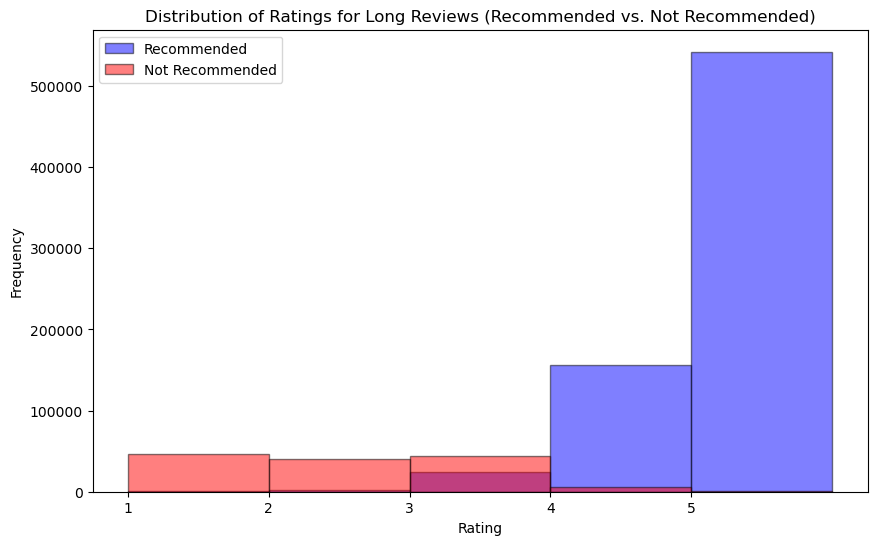

In [285]:
import matplotlib.pyplot as plt

# Plot ratings distribution for recommended vs. not recommended
plt.figure(figsize=(10, 6))

plt.hist(recommended_reviews['rating'], bins=range(1, 7), alpha=0.5, label='Recommended', color='blue', edgecolor='black')
plt.hist(not_recommended_reviews['rating'], bins=range(1, 7), alpha=0.5, label='Not Recommended', color='red', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Long Reviews (Recommended vs. Not Recommended)')
plt.legend()
plt.xticks(range(1, 6))

plt.show()


In [286]:
# Calculate the percentage of each rating for recommended reviews
recommended_percentages = recommended_reviews['rating'].value_counts(normalize=True) * 100

# Calculate the percentage of each rating for not recommended reviews
not_recommended_percentages = not_recommended_reviews['rating'].value_counts(normalize=True) * 100

# Combine the percentages into a DataFrame for easier plotting
percentages_df = pd.DataFrame({
    'Rating': recommended_percentages.index,
    'Recommended': recommended_percentages.values,
    'Not Recommended': not_recommended_percentages.reindex(recommended_percentages.index, fill_value=0).values
})


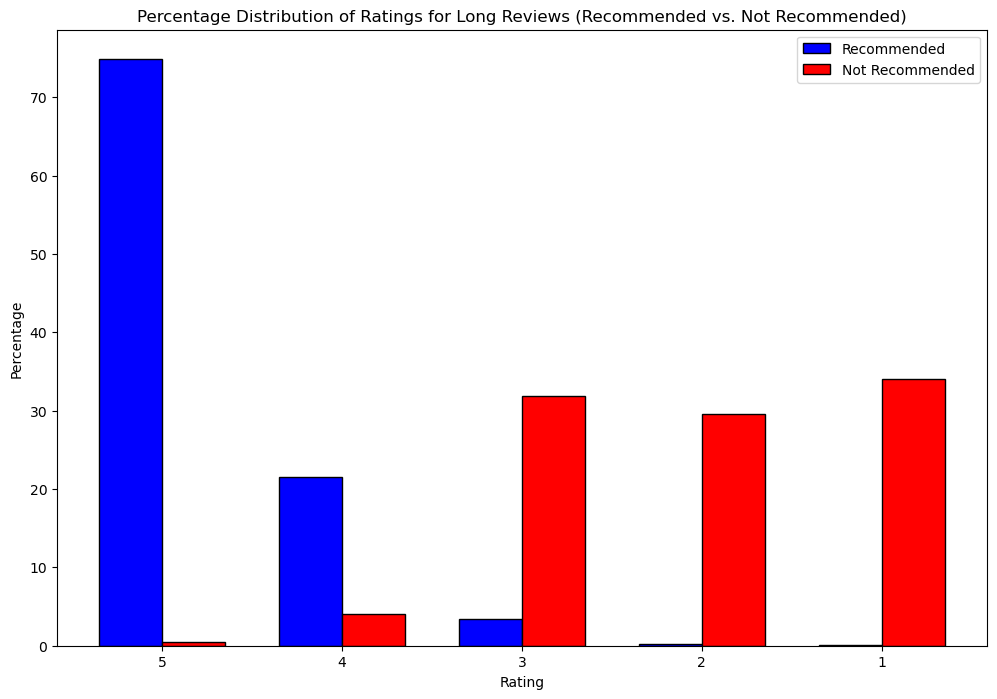

In [287]:
import matplotlib.pyplot as plt

# Plot the percentages
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = range(len(percentages_df['Rating']))

plt.bar(index, percentages_df['Recommended'], bar_width, label='Recommended', color='blue', edgecolor='black')
plt.bar([i + bar_width for i in index], percentages_df['Not Recommended'], bar_width, label='Not Recommended', color='red', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Ratings for Long Reviews (Recommended vs. Not Recommended)')
plt.xticks([i + bar_width / 2 for i in index], percentages_df['Rating'])
plt.legend()

plt.show()


In [288]:
# Filter for short reviews
short_reviews = df[df['review_type'] == 'short']

# Split data based on recommendation
recommended_short_reviews = short_reviews[short_reviews['is_recommended'] == 1.0]
not_recommended_short_reviews = short_reviews[short_reviews['is_recommended'] == 0.0]


In [289]:
# Calculate the percentage of each rating for recommended short reviews
recommended_short_percentages = recommended_short_reviews['rating'].value_counts(normalize=True) * 100

# Calculate the percentage of each rating for not recommended short reviews
not_recommended_short_percentages = not_recommended_short_reviews['rating'].value_counts(normalize=True) * 100

# Combine the percentages into a DataFrame for easier plotting
short_percentages_df = pd.DataFrame({
    'Rating': recommended_short_percentages.index,
    'Recommended': recommended_short_percentages.values,
    'Not Recommended': not_recommended_short_percentages.reindex(recommended_short_percentages.index, fill_value=0).values
})


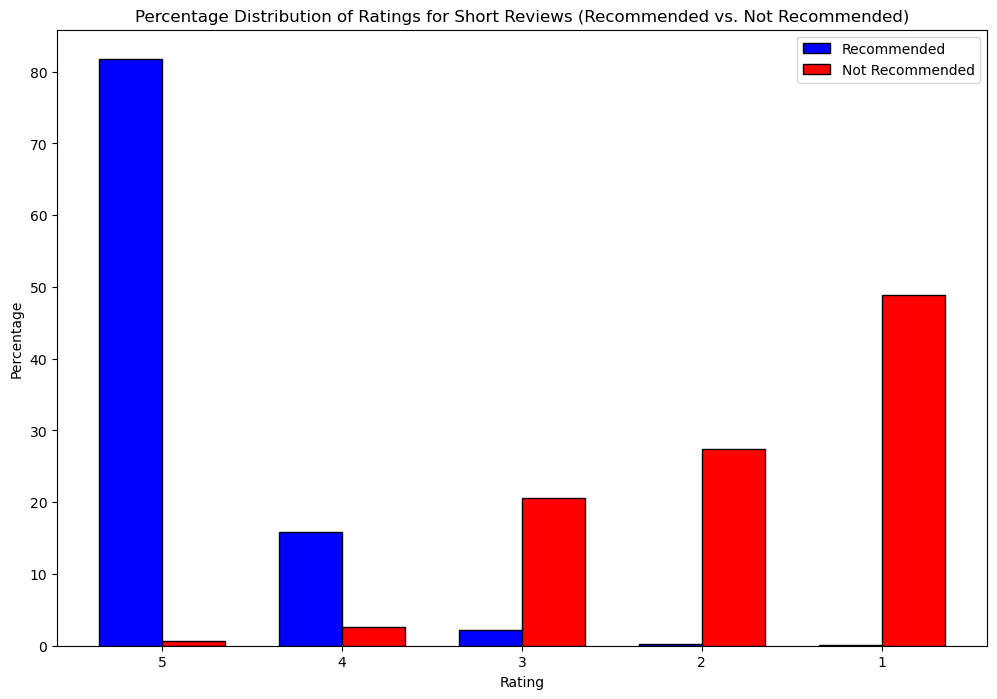

In [290]:
import matplotlib.pyplot as plt

# Plot the percentages
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = range(len(short_percentages_df['Rating']))

plt.bar(index, short_percentages_df['Recommended'], bar_width, label='Recommended', color='blue', edgecolor='black')
plt.bar([i + bar_width for i in index], short_percentages_df['Not Recommended'], bar_width, label='Not Recommended', color='red', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Ratings for Short Reviews (Recommended vs. Not Recommended)')
plt.xticks([i + bar_width / 2 for i in index], short_percentages_df['Rating'])
plt.legend()

plt.show()


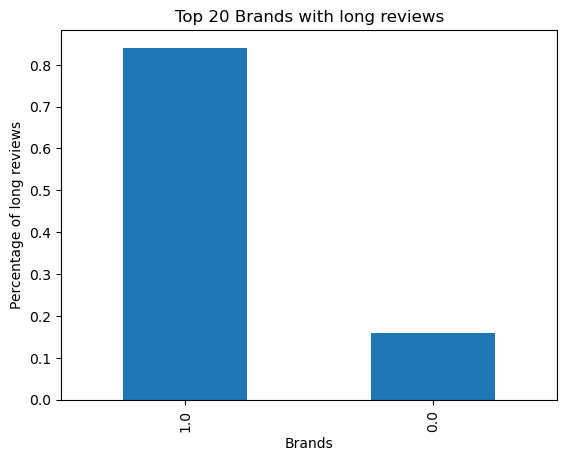

In [291]:
df_rating[ df_rating.review_type == 'long' ].is_recommended.value_counts(normalize=True, ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Brands with long reviews")
plt.xlabel("Brands")
plt.ylabel("Percentage of long reviews")
plt.show()

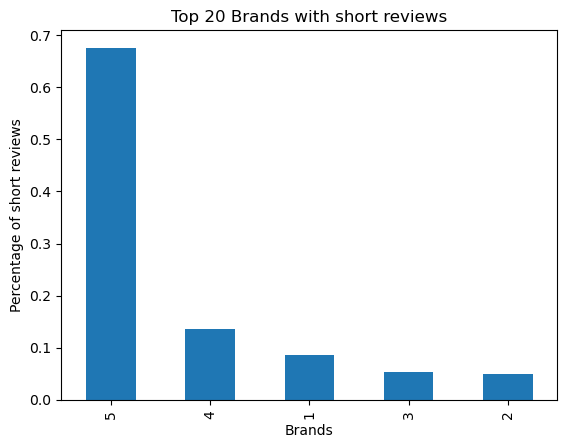

In [295]:
df_rating[ df_rating.review_type == 'short' ].rating.value_counts(normalize=True, ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Brands with short reviews")
plt.xlabel("Brands")
plt.ylabel("Percentage of short reviews")
plt.show()

In [299]:
# Filter for short reviews with rating 3
short_rating_3_reviews = df[(df['review_type'] == 'long') & (df['rating'] == 3)]


In [300]:
# Group by brand name and count
brand_counts = short_rating_3_reviews['brand_name'].value_counts()


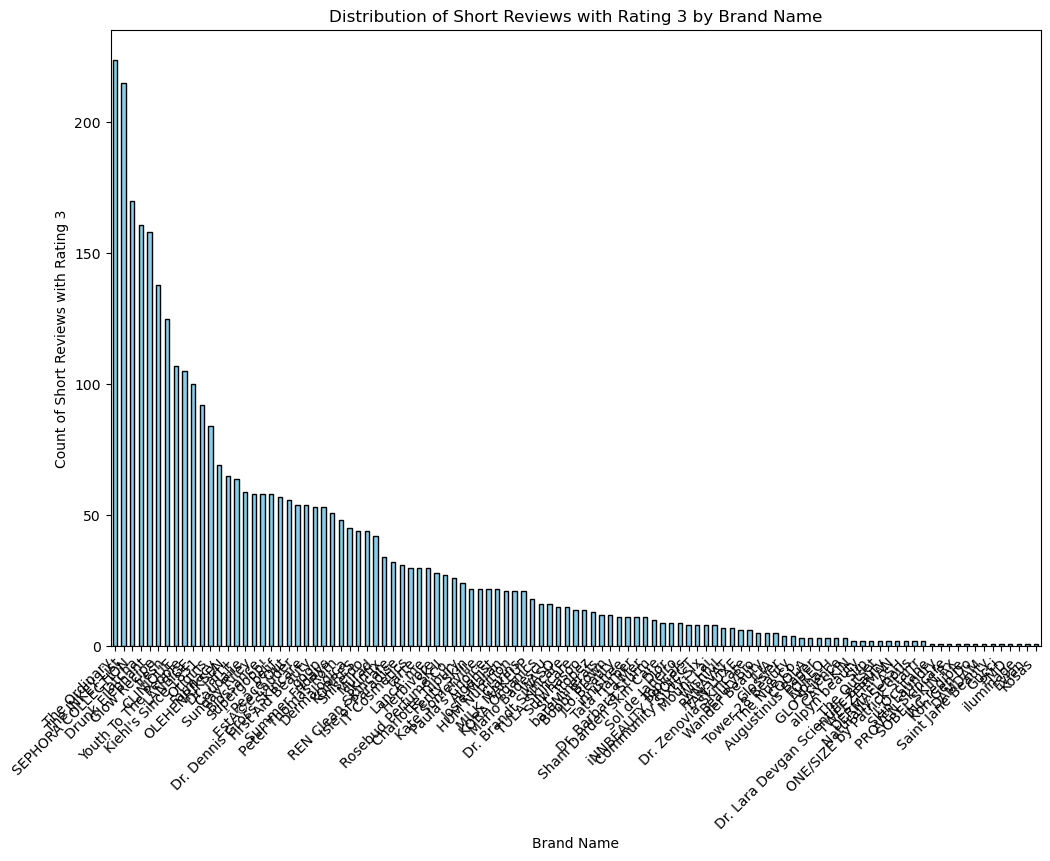

In [298]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(12, 8))
brand_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Brand Name')
plt.ylabel('Count of Short Reviews with Rating 3')
plt.title('Distribution of Short Reviews with Rating 3 by Brand Name')
plt.xticks(rotation=45, ha='right')
plt.show()


In [301]:
# Filter for short reviews with rating 3
short_rating_3_reviews = df[(df['review_type'] == 'short') & (df['rating'] == 3)]


In [302]:
# Group by product name and count, then select the top 20
top_20_products = short_rating_3_reviews['product_name'].value_counts().head(20)


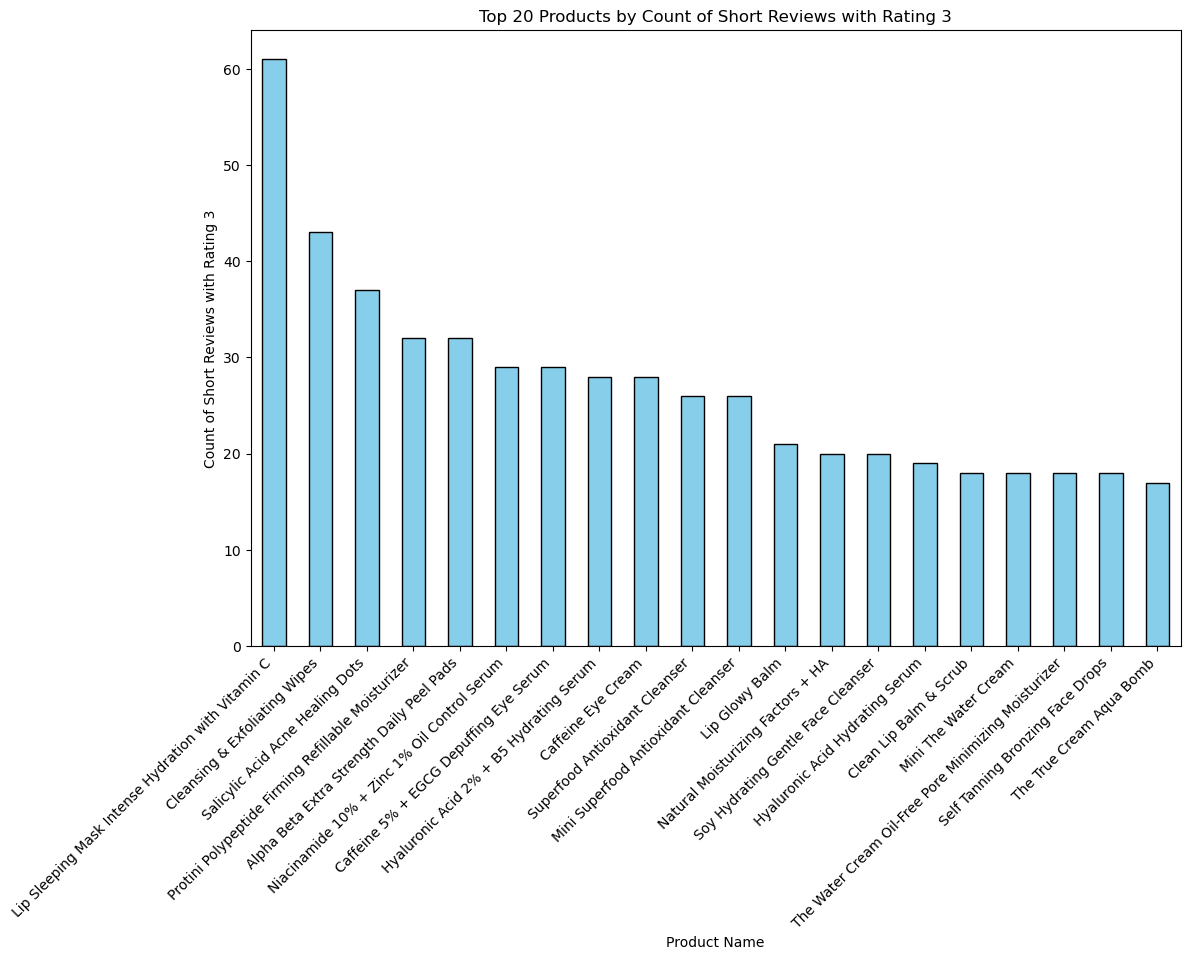

In [303]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(12, 8))
top_20_products.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Product Name')
plt.ylabel('Count of Short Reviews with Rating 3')
plt.title('Top 20 Products by Count of Short Reviews with Rating 3')
plt.xticks(rotation=45, ha='right')
plt.show()


-Lip Sleeping Mask Intense Hydration with Vitamin C
-Cleansing & Exfloliating wipes
-Saliccylic Acid Acne Healing Dots
-Priotini Polypeptide Firming Refillable Moisturize
-Alpha Beta Extra Strength Daily Peel pads

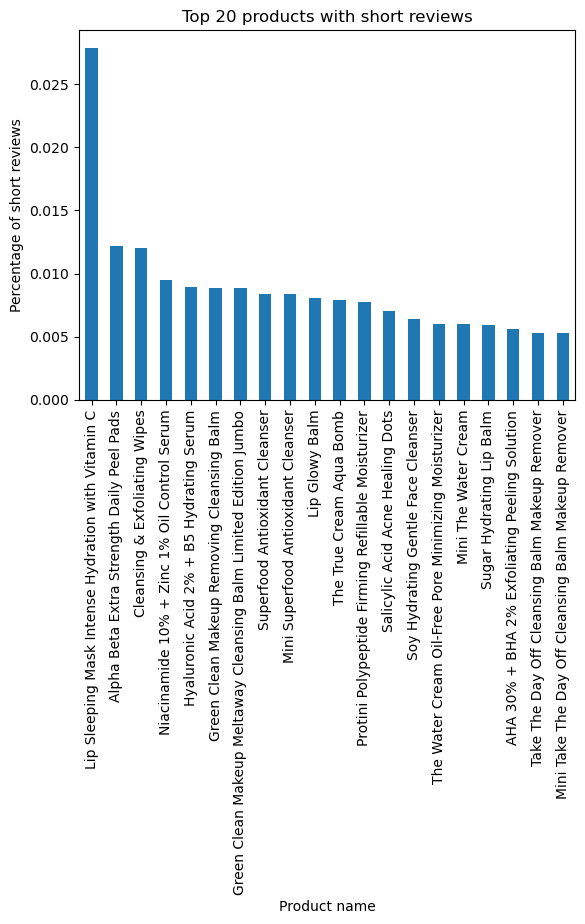

In [307]:
df_rating[ df_rating.review_type == 'short' ].product_name.value_counts(normalize=True, ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 products with short reviews")
plt.xlabel("Product name")
plt.ylabel("Percentage of short reviews")
plt.show()

In [308]:
group_rateprice = df_sample1.groupby(['rating', 'price_usd']).count().reset_index()
group_rateprice.rename(columns={'price_usd': 'transaction count'}, inplace=True)

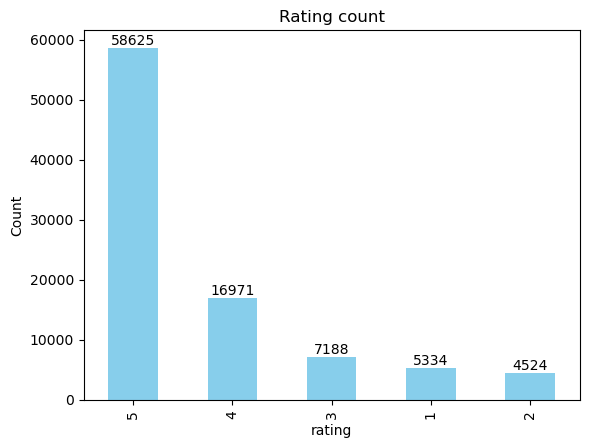

In [310]:
import matplotlib.pyplot as plt

# Create the bar plot
ax = df_sample1['rating'].value_counts().plot(kind='bar', color='skyblue')

# Label the bars with the counts
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the labels and title
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('Rating count')

# Show the plot
plt.show()

In [311]:
# Calculate the percentage of each rating
rating_percentages = df_sample1['rating'].value_counts(normalize=True) * 100

# Display the percentages
print(rating_percentages)

rating
5    63.281233
4    18.318905
3     7.758900
1     5.757648
2     4.883314
Name: proportion, dtype: float64


In [312]:
import pandas as pd

# Sample DataFrame creation (assuming your data is already loaded into df)
# df = pd.read_csv('your_file.csv') # Load your dataset if not already loaded

# Filter reviews with rating 5
df_rating_5 = df_sample1[df_sample1['rating'] == 5]

# Count the total number of rating 5 reviews
total_rating_5 = len(df_rating_5)

# Count long and short reviews
long_reviews_count = df_rating_5[df_rating_5['review_type'] == 'long'].shape[0]
short_reviews_count = df_rating_5[df_rating_5['review_type'] == 'short'].shape[0]

# Calculate percentages
long_percentage = (long_reviews_count / total_rating_5) * 100
short_percentage = (short_reviews_count / total_rating_5) * 100

print(f"Percentage of long reviews with rating 5: {long_percentage:.2f}%")
print(f"Percentage of short reviews with rating 5: {short_percentage:.2f}%")


Percentage of long reviews with rating 5: 92.55%
Percentage of short reviews with rating 5: 7.45%


In [314]:
import pandas as pd

# Sample DataFrame creation (assuming your data is already loaded into df)
# df = pd.read_csv('your_file.csv') # Load your dataset if not already loaded

# Filter for rating 5 and short reviews
df_short_reviews = df_sample1[(df_sample1['rating'] == 5) & (df_sample1['review_type'] == 'short')]

# Group by product_id and count the number of short reviews
product_review_counts = df_short_reviews.groupby('product_id').size().reset_index(name='short_review_count')

# Sort by the number of short reviews in descending order and select the top 20
top_20_products = product_review_counts.sort_values(by='short_review_count', ascending=False).head(20)

# Merge with the original dataset to get product details
top_20_product_details = pd.merge(top_20_products, df[['product_id', 'product_name', 'brand_name']].drop_duplicates(), on='product_id')

print(top_20_product_details)


   product_id  short_review_count  \
0     P420652                 139   
1     P409800                  68   
2     P427419                  55   
3     P269122                  55   
4     P450271                  53   
5     P411387                  50   
6     P394639                  46   
7     P417238                  40   
8     P427417                  40   
9     P441644                  35   
10    P394624                  34   
11    P443563                  33   
12    P427421                  33   
13    P454794                  31   
14    P442563                  30   
15    P453816                  30   
16    P421243                  28   
17    P173726                  27   
18    P456412                  27   
19      P7880                  27   

                                         product_name  \
0   Lip Sleeping Mask Intense Hydration with Vitam...   
1                       Cleansing & Exfoliating Wipes   
2             Hyaluronic Acid 2% + B5 Hydrating Ser

C:\Users\Dell\AppData\Local\Temp\ipykernel_21172\822475149.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='short_review_count', y='product_name', data=top_20_product_details, palette='viridis')


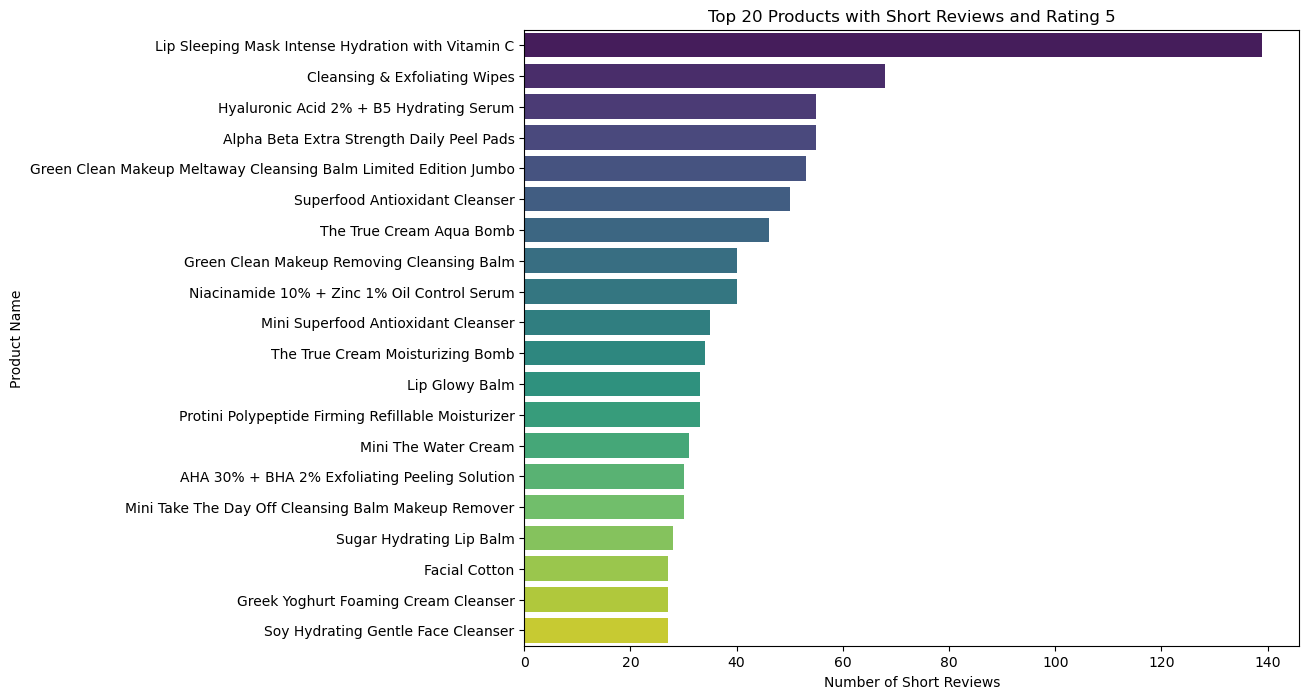

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation (assuming your data is already loaded into df)
# df = pd.read_csv('your_file.csv') # Load your dataset if not already loaded

# Filter for rating 5 and short reviews
df_short_reviews = df_sample1[(df_sample1['rating'] == 5) & (df_sample1['review_type'] == 'short')]

# Group by product_id and count the number of short reviews
product_review_counts = df_short_reviews.groupby('product_id').size().reset_index(name='short_review_count')

# Sort by the number of short reviews in descending order and select the top 20
top_20_products = product_review_counts.sort_values(by='short_review_count', ascending=False).head(20)

# Merge with the original dataset to get product details
top_20_product_details = pd.merge(top_20_products, df[['product_id', 'product_name']].drop_duplicates(), on='product_id')

# Plotting the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='short_review_count', y='product_name', data=top_20_product_details, palette='viridis')
plt.title('Top 20 Products with Short Reviews and Rating 5')
plt.xlabel('Number of Short Reviews')
plt.ylabel('Product Name')
plt.show()


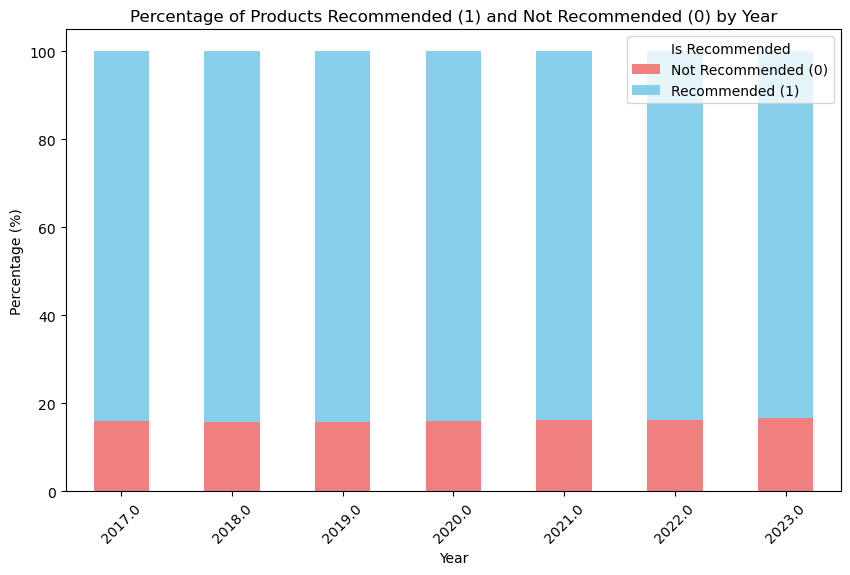

In [316]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'submission_time' to datetime if it isn't already
df['submission_time'] = pd.to_datetime(df['submission_time'])

# Extract the year from the 'submission_time' column
df['year'] = df['submission_time'].dt.year

# Group by year and is_recommended, then calculate the size of each group
grouped = df.groupby(['year', 'is_recommended']).size().unstack(fill_value=0)

# Calculate the percentage of recommendations (1s and 0s) per year
percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], figsize=(10, 6))
plt.title('Percentage of Products Recommended (1) and Not Recommended (0) by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Is Recommended', labels=['Not Recommended (0)', 'Recommended (1)'])
plt.xticks(rotation=45)
plt.show()